**Load Dataset, check the shape and statistics of Dataset. Also make features and label class separate**

In [96]:
# https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset

import pandas as pd

df = pd.read_csv('/content/Multiclass Diabetes Dataset.csv')
df.isna().sum
df.duplicated().sum

X = df.drop(columns=['Class'])
y = df['Class']


**Split Training and Testing examples**

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Converting into Matrices so that I can compute Neural Network's calculation in Forward pass and Backpropagation**

In [98]:
import numpy as np
num_classes = len(np.unique(y))

y_train_matrix = np.eye(num_classes)[y_train]
y_test_matrix = np.eye(num_classes)[y_test]

**Developing a weights and bias Matrix that will be fed into network **

In [99]:
X = X_train.to_numpy()

x_test_matrix = X_test.to_numpy()

x_test_matrix = (x_test_matrix - x_test_matrix.mean(axis=0)) / x_test_matrix.std(axis=0)
X = (X - X.mean(axis=0)) / X.std(axis=0)

num_features = X.shape[1]
weights = np.random.rand(num_features,num_classes) * 0.01
bias = np.zeros((1, num_classes))

**Function for Feed forward and Back propagation in Neural Network**

In [100]:
num_epochs = 1000
learning_rate = .01
loss_vector = []
val_loss_vector = []

# Applying Matrix Multiplication
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cal_Z():
  global bias
  mat_mul = np.dot(X,weights)
  return mat_mul + bias
def update_weights ():
  global  weights
  weights = weights- learning_rate*calcGradients()

def activation(z):
  return softmax(z)

def calcGradients():
  global bias
  z = cal_Z()
  a = activation(z)
  loss =  (a-y_train_matrix)
  bias -= learning_rate * np.mean(a - y_train_matrix, axis=0, keepdims=True)


  gradient = np.dot(X.T,loss)
  gradient /=  X.shape[0]


  eps = 1e-8  # to avoid log(0)
  cce_loss = -np.mean(np.sum(y_train_matrix * np.log(a + eps), axis=1))
  loss_vector.append(cce_loss)

  z_val = np.dot(x_test_matrix, weights) + bias
  y_val_pred = softmax(z_val)
  val_loss = -np.mean(np.sum(y_test_matrix * np.log(y_val_pred + 1e-8), axis=1))
  val_loss_vector.append(val_loss)

  return gradient

for epoch in range(num_epochs):
  update_weights()

len(loss_vector)

1000

**Applying Forward Pass on test data**

In [101]:

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)



z_test = np.dot(x_test_matrix, weights) + bias
y_pred = softmax(z_test)
y_pred_class = np.argmax(y_pred, axis=1)

if isinstance(y_test, pd.Series):
   y_test = y_test.to_numpy()
  # # Calculate Accuracy Score
accuracy = np.mean(y_pred_class == y_test)

print("Accuracy : ",accuracy)

Accuracy :  0.8301886792452831


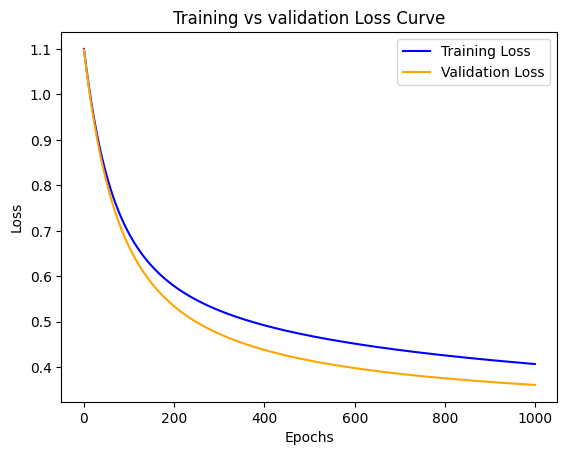

Training Loss:  0.40700353232576564
Testing Loss:  0.3610231112117362


In [103]:
import matplotlib.pyplot as plt

plt.plot(loss_vector, label='Training Loss', color='blue')

plt.plot(val_loss_vector, label='Validation Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs validation Loss Curve')
plt.legend()
plt.show()

print("Training Loss: ",loss_vector[-1])
print("Testing Loss: ",val_loss_vector[-1])
